In [1]:
import pandas as pd
import numpy as np
oo = pd.read_excel(r'C:\Users\User\Desktop\jupyter\test sb\one_task.xlsx')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
oo

,Неделя,Месяц,Локация,Обработаная база,Успешно дозвонились,Презентовали,Продукт,Согласились,Продали,Канал
0,29,2023-07,Автоматизированная система,4916,4916,4916,Подбор вклада,4916,0,Автоматизированная система
1,29,2023-07,Душанбе,772,772,772,Подбор кредита,772,479,Аутсорсинг
2,30,2023-07,Китежград,66,66,66,Защита здоровья,0,0,Собственные ресурсы
3,28,2023-07,Зеленоград,934,934,934,Защита здоровья,934,47,Собственные ресурсы
4,28,2023-07,Китежград,990,990,990,Защита здоровья,0,1,Собственные ресурсы
...,...,...,...,...,...,...,...,...,...,...
651,26,2023-06,Дейли,1,1,1,Защита ипотеки,0,1,Аутсорсинг
652,26,2023-06,Череповец,1,1,0,Защита здоровья,0,0,Собственные ресурсы
653,26,2023-06,Китежград,281,281,0,Защита здоровья,0,0,Собственные ресурсы
654,26,2023-06,Нягань,3048,0,0,Защита здоровья,0,0,Собственные ресурсы


### - влияет ли успешность дозвона по базе/продукту на конверсию?

In [69]:
konversion = oo.groupby('Продукт').sum()
konversion2 = oo.groupby('Локация').sum()
konversion['Конверсия %'] = konversion['Продали']/konversion['Успешно дозвонились']*100
konversion2['Конверсия %'] = konversion2['Продали']/konversion2['Успешно дозвонились']*100
konversForProd = konversion[['Конверсия %']].rename(index={'Активация портативного устройства':'Актив. порт. устр.'})
konversForLoc = konversion2[['Конверсия %']].rename(index={'Автоматизированная система':'Робот'})
konversion
#konversion2

,Неделя,Обработаная база,Успешно дозвонились,Презентовали,Согласились,Продали,Конверсия %
Продукт,,,,,,,
Активация портативного устройства,1514,18278,14174,5468,1363,987,6.963454
Защита здоровья,8410,83959,54315,29678,9582,589,1.084415
Защита ипотеки,1664,106599,74705,31760,3537,16051,21.485844
Защита устройства,1200,1176556,850623,423117,229695,0,0.000000
Пенсионая программа,1794,24992,21369,7789,1933,5366,25.111142
Подбор вклада,699,46779,41345,32438,19375,0,0.000000
Подбор кредита,3031,122489,79905,32845,6464,4529,5.667981


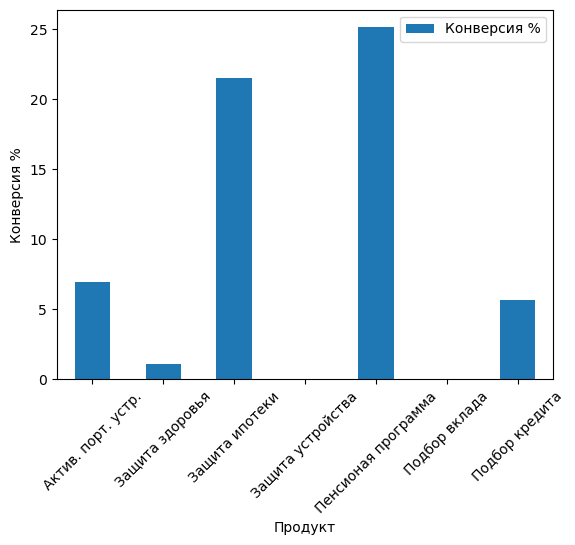

In [70]:
konversForProd.plot(kind='bar', )
plt.xlabel('Продукт')
plt.ylabel('Конверсия %')
plt.xticks(rotation=45)
plt.show()

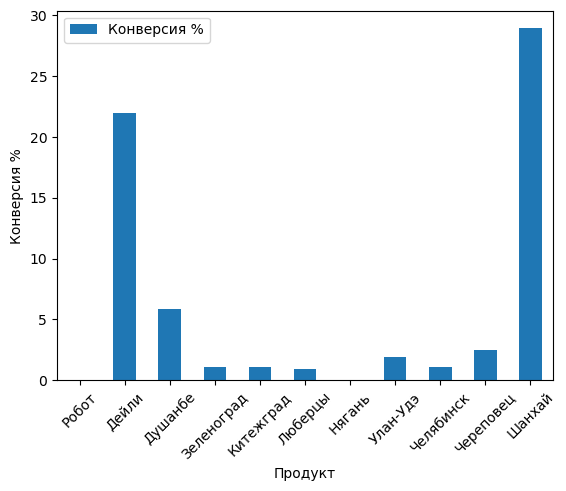

In [71]:
konversForLoc.plot(kind='bar', )
plt.xlabel('Продукт')
plt.ylabel('Конверсия %')
plt.xticks(rotation=45)
plt.show()

### -  влияет ли эффективность продаж (переход от презентации к согласиям) каналов/локаций на конверсию

In [74]:
second_q = oo.groupby('Канал').sum()
second_q['Конверсия %'] = second_q['Продали']/second_q['Успешно дозвонились']*100
second_q['эффективность продаж %'] = second_q['Согласились']/second_q['Презентовали']*100
second_q

,Неделя,Обработаная база,Успешно дозвонились,Презентовали,Согласились,Продали,Конверсия %,эффективность продаж %
Канал,,,,,,,,
Автоматизированная система,1899,1223335,891968,455555,249070,0,0.000000,54.673969
Аутсорсинг,6940,269721,188307,76833,12949,26793,14.228361,16.853435
Собственные ресурсы,9473,86596,56161,30707,9930,729,1.298054,32.337903


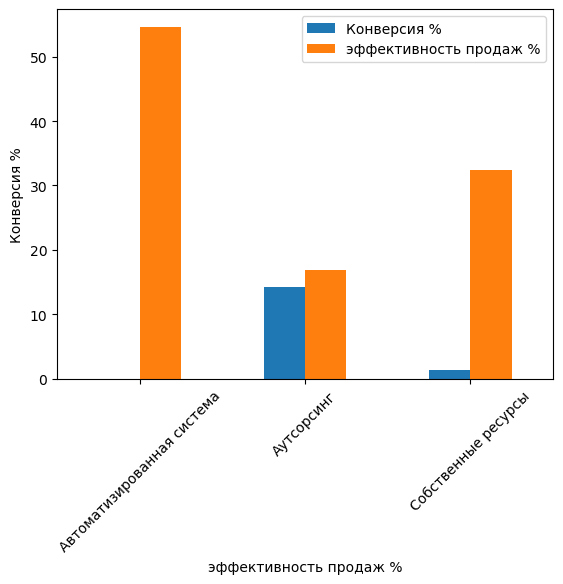

In [77]:
Plot_1 = second_q[['Конверсия %','эффективность продаж %']]

Plot_1.plot(kind='bar', )
plt.xlabel('эффективность продаж %')
plt.ylabel('Конверсия %')
plt.xticks(rotation=45)
plt.show()

In [78]:
second_q = oo.groupby('Локация').sum()
second_q['Конверсия %'] = second_q['Продали']/second_q['Успешно дозвонились']*100
second_q['эффективность продаж %'] = second_q['Согласились']/second_q['Презентовали']*100
second_q

,Неделя,Обработаная база,Успешно дозвонились,Презентовали,Согласились,Продали,Конверсия %,эффективность продаж %
Локация,,,,,,,,
Автоматизированная система,1899,1223335,891968,455555,249070,0,0.000000,54.673969
Дейли,3146,126690,91906,38167,5135,20211,21.990947,13.454031
Душанбе,3482,138130,92233,37284,7479,5376,5.828716,20.059543
Зеленоград,1682,17605,17546,9671,3546,194,1.105665,36.666322
Китежград,1457,11545,11519,5906,1893,122,1.059120,32.052150
Люберцы,1373,8101,8076,4366,1646,74,0.916295,37.700412
Нягань,223,30298,0,0,0,0,NaN,NaN
Улан-Удэ,2048,7758,7748,4313,1358,148,1.910170,31.486204
Челябинск,1284,6395,6384,3621,717,71,1.112155,19.801160


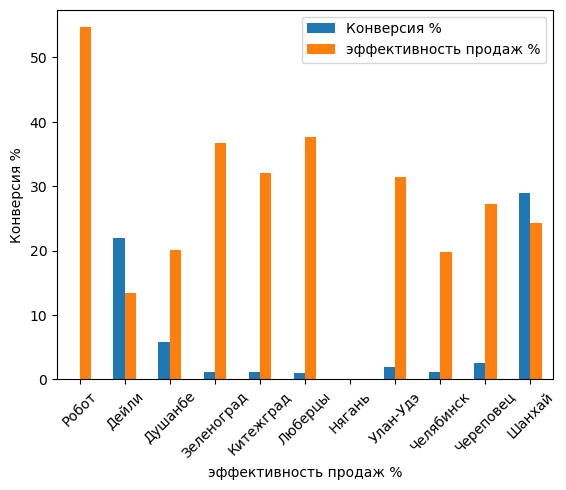

In [80]:
Plot_2 = second_q[['Конверсия %','эффективность продаж %']].rename(index={'Автоматизированная система':'Робот'})

Plot_2.plot(kind='bar', )
plt.xlabel('эффективность продаж %')
plt.ylabel('Конверсия %')
plt.xticks(rotation=45)
plt.show()

### - иные причины
### - выявить наиболее влияющие факторы на итоговую конверсию.